<a href="https://colab.research.google.com/github/M-luthra07/RNN/blob/main/Practical_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [2]:
# Load data
df = pd.read_csv('/content/btc-1.csv')



In [3]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To
0,5/26/2018,BTCUSD,7459.11,7640.46,7380.00,7520.00,2722.80,2.042265e+07
1,5/25/2018,BTCUSD,7584.15,7661.85,7326.94,7459.11,8491.93,6.342069e+07
2,5/24/2018,BTCUSD,7505.00,7734.99,7269.00,7584.15,11033.72,8.293137e+07
3,5/23/2018,BTCUSD,7987.70,8030.00,7433.19,7505.00,14905.99,1.148104e+08
4,5/22/2018,BTCUSD,8393.44,8400.00,7950.00,7987.70,6589.43,5.389753e+07


In [4]:
# Check for column name - adjust if needed
print("Columns:", df.columns)

# Assuming the column is 'Close' for closing price
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

Columns: Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume From',
       'Volume To'],
      dtype='object')


In [5]:
# Create sequences
X, y = [], []
seq_len = 60  # Use last 60 days to predict the next day
for i in range(seq_len, len(scaled_data)):
    X.append(scaled_data[i-seq_len:i])
    y.append(scaled_data[i])

X, y = np.array(X), np.array(y)

# Split data into train/test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [6]:
# Build RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0290 - val_loss: 2.6964e-05
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.0261e-04 - val_loss: 4.5476e-05
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.3971e-04 - val_loss: 1.9662e-06
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.5777e-04 - val_loss: 1.3177e-06
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.2642e-04 - val_loss: 1.6579e-05
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.8644e-04 - val_loss: 1.0166e-06
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.6146e-04 - val_loss: 2.7366e-05
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.8729e-04 - val_loss: 1.7764e-05
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 5.0400e-04 - val_loss: 1.2707e-06
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.9232e-04 - val_loss: 4.5687e-06
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.1242e-04 - 

In [9]:
# Predict
y_pred = model.predict(X_test)
print(y_pred )

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[ 3.1636953e-03]
 [ 3.1346818e-03]
 [ 3.4403671e-03]
 [ 3.7177410e-03]
 [ 3.7304386e-03]
 [ 3.8691703e-03]
 [ 3.4896825e-03]
 [ 3.3205189e-03]
 [ 3.4116860e-03]
 [ 2.6744045e-03]
 [ 2.6548859e-03]
 [ 2.7557099e-03]
 [ 2.7398244e-03]
 [ 2.7478114e-03]
 [ 2.6092669e-03]
 [ 2.8897608e-03]
 [ 2.8805314e-03]
 [ 2.9350920e-03]
 [ 3.1885039e-03]
 [ 3.6111325e-03]
 [ 4.2910576e-03]
 [ 4.3939818e-03]
 [ 3.4701135e-03]
 [ 2.6446925e-03]
 [ 2.4389233e-03]
 [ 1.9587707e-03]
 [ 2.0792158e-03]
 [ 2.2376366e-03]
 [ 1.9672271e-03]
 [ 1.6048821e-03]
 [ 1.3805460e-03]
 [ 1.5125582e-03]
 [ 1.6354863e-03]
 [ 1.9194195e-03]
 [ 1.5158206e-03]
 [ 1.5205853e-03]
 [ 1.5496984e-03]
 [ 9.7603351e-04]
 [ 7.1171392e-04]
 [ 9.7842701e-04]
 [ 9.2548691e-04]
 [ 7.4629951e-04]
 [ 8.4634963e-04]
 [ 9.1851316e-04]
 [ 1.2189765e-03]
 [ 1.2047570e-03]
 [ 1.3417648e-03]
 [ 8.4905978e-04]
 [ 4.9897004e-04]
 [ 6.4598583e-04]
 [ 2.9175915e-04]
 [ 1.8077996e-04]
 [ 1.2340117e-04]
 [ 6.720

In [15]:
# Inverse scale to get actual prices
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)
print(y_pred_actual)
print('y_test_actual')
print(y_test_actual)

[[181.78697 ]
 [181.22034 ]
 [187.19037 ]
 [192.60748 ]
 [192.85547 ]
 [195.5649  ]
 [188.1535  ]
 [184.84973 ]
 [186.63023 ]
 [172.23112 ]
 [171.84991 ]
 [173.81902 ]
 [173.50877 ]
 [173.66475 ]
 [170.95898 ]
 [176.43703 ]
 [176.25677 ]
 [177.32234 ]
 [182.27148 ]
 [190.52542 ]
 [203.80435 ]
 [205.81447 ]
 [187.77132 ]
 [171.65085 ]
 [167.63217 ]
 [158.25479 ]
 [160.60709 ]
 [163.70105 ]
 [158.41995 ]
 [151.34335 ]
 [146.96207 ]
 [149.54027 ]
 [151.94104 ]
 [157.48627 ]
 [149.60397 ]
 [149.69704 ]
 [150.26561 ]
 [139.06194 ]
 [133.89978 ]
 [139.10867 ]
 [138.07475 ]
 [134.57523 ]
 [136.5292  ]
 [137.93857 ]
 [143.80661 ]
 [143.5289  ]
 [146.20467 ]
 [136.58214 ]
 [129.74489 ]
 [132.6161  ]
 [125.69806 ]
 [123.53063 ]
 [122.41003 ]
 [121.31254 ]
 [120.99854 ]
 [116.82341 ]
 [118.33451 ]
 [118.678154]
 [121.04687 ]
 [120.368034]
 [120.01401 ]
 [121.31128 ]
 [126.339485]
 [128.87274 ]
 [132.05035 ]
 [129.89761 ]
 [127.34196 ]
 [133.68565 ]
 [132.07724 ]
 [135.87126 ]
 [136.35738 ]
 [134.

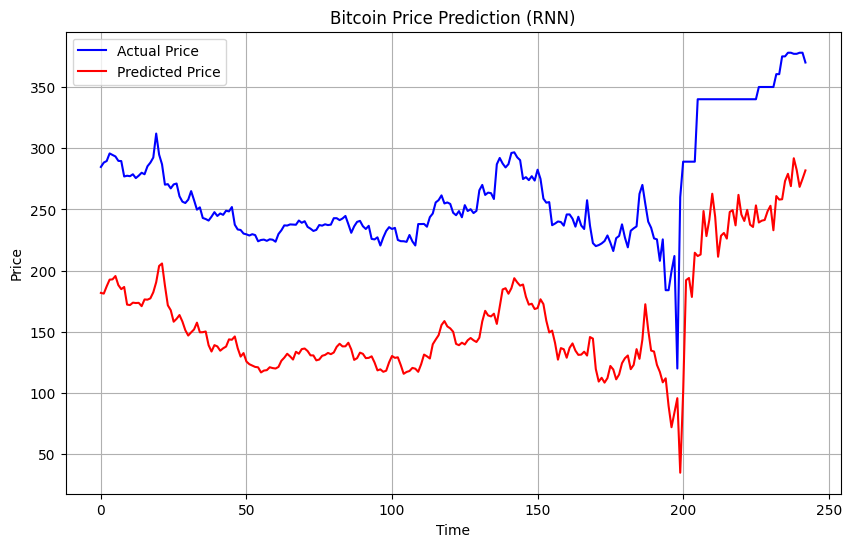

In [11]:
# Plot predicted vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Price')
plt.plot(y_pred_actual, color='red', label='Predicted Price')
plt.title('Bitcoin Price Prediction (RNN)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Evaluation
mse = mean_squared_error(y_test_actual, y_pred_actual)
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 11140.672142985803
Mean Absolute Error (MAE): 104.5569907306938
R^2 Score: -4.667606994952067


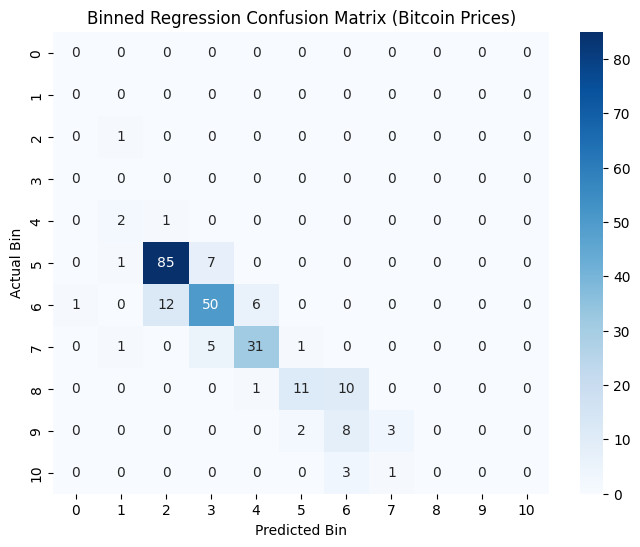

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Bin the values (10 equal-width bins)
bins = np.linspace(min(y_test_actual.min(), y_pred_actual.min()),
                   max(y_test_actual.max(), y_pred_actual.max()), 11)

# Convert continuous values to bin indices
y_test_binned = np.digitize(y_test_actual.flatten(), bins)
y_pred_binned = np.digitize(y_pred_actual.flatten(), bins)

# Create and plot confusion-like matrix
conf_matrix = confusion_matrix(y_test_binned, y_pred_binned)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Binned Regression Confusion Matrix (Bitcoin Prices)')
plt.xlabel('Predicted Bin')
plt.ylabel('Actual Bin')
plt.show()
